In [3]:
! ls ../data/srt.chrM*bam

../data/srt.chrM_SRR2156397.kallisto.bam ../data/srt.chrM_SRR2164514.kallisto.bam ../data/srt.chrM_SRR2170756.kallisto.bam


In [4]:
import pysam

In [20]:
from matplotlib import pyplot as plt

In [36]:
bam1 = pysam.AlignmentFile("../data/srt.chrM_SRR2156397.kallisto.bam", "rb")
bam2 = pysam.AlignmentFile("../data/srt.chrM_SRR2164514.kallisto.bam", "rb")
bam3 = pysam.AlignmentFile("../data/srt.chrM_SRR2170756.kallisto.bam", "rb")


In [14]:
ref=bam1.getrname(0)

In [30]:
def get_cvrg(bam):
    covered_positions = [pileupColumn.pos for pileupColumn in bam.pileup(ref,0,16569)]
    coverage = [pileupColumn.n for pileupColumn in bam.pileup(ref,0,16569)]
    return (covered_positions,coverage)

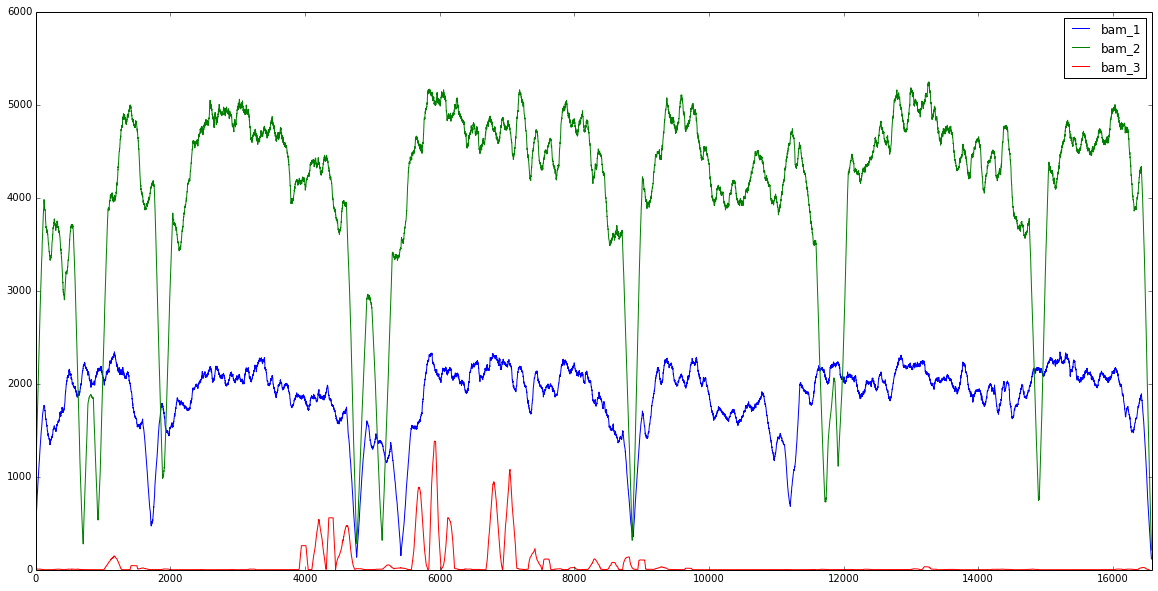

In [40]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.xlim([0,16569])

i=0
for b in [bam1,bam2,bam3]:
    i+=1
    x,y = get_cvrg(b)
    plt.plot(x,y, label="bam_"+str(i))

plt.legend()